In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
bike_rentals = pd.read_csv("hour.csv")

In [5]:
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In many American cities, there are communal bicycle sharing stations where you can rent bicycles by the hour or by the day. Washington, D.C. is one of these cities, and has detailed data available about how many bicycles were rented by hour and by day.
This dataset comes from UCI Machine Learning Repository.

Here are explanations of the relevant columns:

<ul>
<li>instant -- a unique sequential id number for each row.</li>
<li>dteday -- the date the rentals occurred on.</li>
<li>season -- the season the rentals occurred in.</li>
<li>yr -- the year the rentals occurred in.</li>
<li>mnth -- the month the rentals occurred in.</li>
<li>hr -- the hour the rentals occurred in.</li>
<li>holiday -- whether or not the day was a holiday.</li>
<li>weekday -- whether or not the day was a weekday.</li>
<li>workingday -- whether or not the day was a working day.</li>
<li>weathersit -- the weather situation (categorical variable).</li>
<li>temp -- the temperature on a 0-1 scale.</li>
<li>atemp -- the adjusted temperature.</li>
<li>hum -- the humidity on a 0-1 scale.</li>
<li>windspeed -- the wind speed on a 0-1 scale.</li>
<li>casual -- the number of casual riders (people who hadn't previously signed up with the bikesharing program) that rented bikes.</li>
<li>registered -- the number of registered riders (people who signed up previously) that rented bikes.</li>
<li>cnt -- the total number of bikes rented (casual + registered).</li>
</ul>


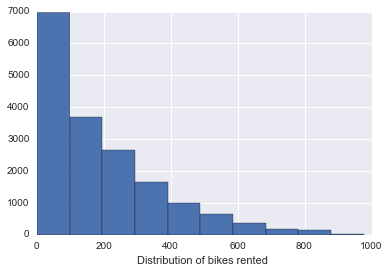

In [7]:
# Take a look at the distribution of the target variable

plt.hist(bike_rentals["cnt"])
plt.xlabel("Distribution of bikes rented ")

Seems like there was almost no bike rented in many days, around 7000, but at the same time there are days where 1000+ bikes were rented.

In [9]:
# Check the pairwise correlation among different variables

bike_rentals.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


In [10]:
bike_rentals.corr()["cnt"]

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

Holiday is negatively correlated with bike rentals, which might suggest most people were taking bikes for going to work, but working day and weekday seems to be losely correated. Hr seems to have good correlation because it's possible some hours are busier than others. Casual and registered are heavily correlated but it's meaningless as casual + registered = total cnt.

# Feature engineering :

Even if the hours are related, scikit learn might decipher the hours as seperate and treat all 24 hours as different categories. So we create a new column time labels to label hours as morning = 1, afternoon = 2, evening = 3 and night = 4.

In [14]:
def apply_label(hour):
    if hour >=6 and hour<= 12:
        return 1 #morning
    elif hour >=12 and hour<=18:
        return 2 #afternoon
    elif hour >=18 and hour <=24:
        return 3 #evening
    else:
        return 4 #night

In [15]:
bike_rentals["time_label"] = bike_rentals["hr"].apply(apply_label)

In [16]:
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4


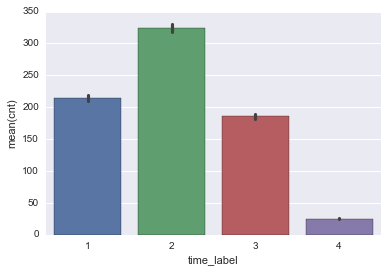

In [21]:
sns.barplot(x = "time_label", y = "cnt", data = bike_rentals)


It looks like most of the bikes were rented in afternoon, and really few in night which makes sense.

# Train Test Split:

We use MSE(Mean squared error) as our error metric as it's a good fit for continuous numeric variables as count of bike rentals and it's going to punish the large errors more.

In [22]:
train = bike_rentals.sample(frac = 0.8)

In [23]:
train.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
346,347,2011-01-15,1,0,1,22,0,6,0,2,0.30,0.3182,0.42,0.1045,0,26,26,3
9104,9105,2012-01-20,1,1,1,6,0,5,1,1,0.24,0.2121,0.60,0.2836,0,68,68,1
5294,5295,2011-08-13,3,0,8,12,0,6,0,2,0.66,0.5909,0.89,0.1642,175,246,421,1
4262,4263,2011-07-01,3,0,7,12,0,5,1,1,0.80,0.6970,0.26,0.0000,83,180,263,1
12236,12237,2012-05-30,2,1,5,1,0,3,1,3,0.64,0.5758,0.89,0.1940,0,4,4,4


In [24]:
test = bike_rentals[~bike_rentals.index.isin(train.index)]

In [25]:
test.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,4
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,1
19,20,2011-01-01,1,0,1,19,0,6,0,3,0.42,0.4242,0.88,0.2537,6,31,37,3


In [26]:
print train.shape[0]
print test.shape[0]

13903
3476


# Linear Regression:

Considering Linear Regression is a simple model, it's kind of unlikely it will fit the data well given there's a huge difference between days with large numbers of rentals vs the days that have none.

In [32]:
predictors = list(bike_rentals.columns)
predictors

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt',
 'time_label']

In [33]:
predictors.remove('casual')
predictors.remove('registered')
predictors.remove('dteday')
predictors.remove('cnt')

In [37]:
predictors

['instant',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'time_label']

In [39]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()

lin.fit(train[predictors],train["cnt"])



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
pred = lin.predict(test[predictors])

In [42]:
from sklearn.metrics import mean_squared_error

print mean_squared_error(test["cnt"],pred)

16795.228163


With this high error, this model is not going anywhere. Incredibly bad performance.

# Decision Tree : 

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [46]:
reg = DecisionTreeRegressor()

reg.fit(train[predictors],train["cnt"])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [47]:
pred = reg.predict(test[predictors])

In [48]:
print mean_squared_error(test["cnt"],pred)

3090.89298044


Decision trees have way better performance than Linear Regression had done. Wow.

# Random Forest :

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
r_forest = RandomForestRegressor()

In [59]:
r_forest.fit(train[predictors],train["cnt"])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [60]:
pred = r_forest.predict(test[predictors])

In [61]:
print mean_squared_error(test["cnt"],pred)

1595.55758631


And Random Forest even cut the error by half. Honestly I think this is good enough for performance.